<a href="https://colab.research.google.com/github/Haamid219/NIDS/blob/main/NIDS_model_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [5]:
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Remove leading/trailing spaces

    FEATURE_COLUMNS = [
        'Destination Port', 'Flow Duration', 'Total Fwd Packets',
        'Total Backward Packets', 'Total Length of Fwd Packets',
        'Total Length of Bwd Packets', 'Flow Bytes/s',
        'Flow Packets/s', 'Fwd Packets/s',
        'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
        'Packet Length Mean', 'Packet Length Std', 'FIN Flag Count',
        'SYN Flag Count', 'RST Flag Count',
        'ACK Flag Count','Average Packet Size',
    ]
    LABEL_COLUMN = 'Label'

    # Select only the required features and the label
    data = data[FEATURE_COLUMNS + [LABEL_COLUMN]]

    # Replace inf values with NaN
    data.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values (which include original NaNs and converted inf values)
    data.dropna(inplace=True)

    # Encode the labels
    label_encoder = LabelEncoder()
    data[LABEL_COLUMN] = label_encoder.fit_transform(data[LABEL_COLUMN])

    # Scale the features
    scaler = StandardScaler()
    data[FEATURE_COLUMNS] = scaler.fit_transform(data[FEATURE_COLUMNS])

    return data

In [6]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length, :-1])
        labels.append(data[i + seq_length, -1])
    return np.array(sequences), np.array(labels)

In [7]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred.flatten()) * 100

In [27]:
def train_and_evaluate(file_paths, seq_length=10, epochs=10, batch_size=32):
    for file_path in file_paths:
        data = load_and_preprocess_data(file_path)
        sequences, labels = create_sequences(data.values, seq_length)
        X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)
        model = build_model(input_shape=(X_train.shape[1], X_train.shape[2]))
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
        loss, accuracy = model.evaluate(X_test, y_test)
        print(f'Test Accuracy for {file_path}: {accuracy:.4f}')
        predictions = model.predict(X_test)
        predicted_classes = (predictions > 0.5).astype(int)
        accuracy_percentage = check_accuracy(y_test, predicted_classes)
        print(f'Accuracy Percentage for {file_path}: {accuracy_percentage:.2f}%')

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Model Accuracy for {file_path}')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss for {file_path}')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()
    return model

In [22]:
file_paths = [
    '/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    '/content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    '/content/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    '/content/Monday-WorkingHours.pcap_ISCX.csv',
    '/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    '/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    '/content/Tuesday-WorkingHours.pcap_ISCX.csv',
]

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 54s 11ms/step - accuracy: 0.9904 - loss: 0.0340 - val_accuracy: 0.9989 - val_loss: 0.0044
Epoch 2/10
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0029
Epoch 3/10
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.9996 - loss: 0.0031 - val_accuracy: 0.9997 - val_loss: 0.0017
Epoch 4/10
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 78s 11ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 5/10
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9998 - val_loss: 0.0016
Epoch 6/10
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 7/10
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 8/10
4514/4514 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.9997 -

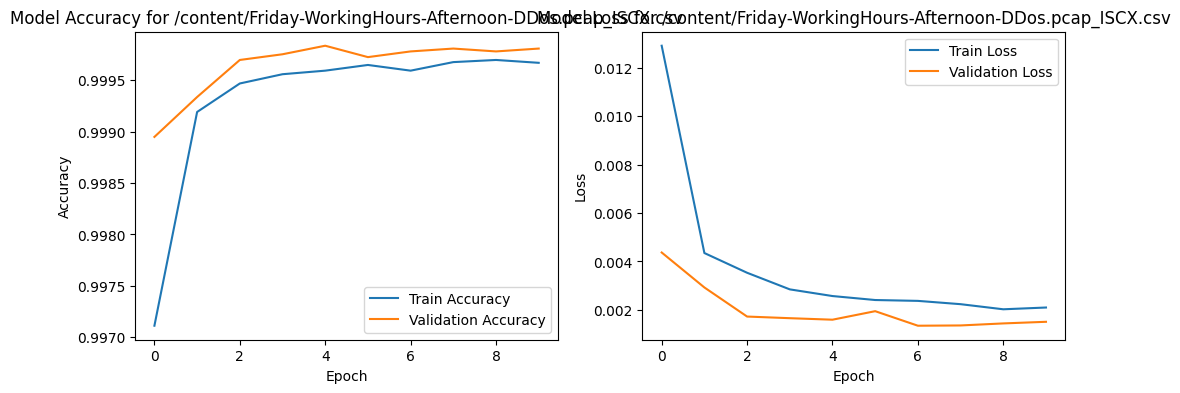

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 80s 13ms/step - accuracy: 0.9833 - loss: 0.0781 - val_accuracy: 0.9900 - val_loss: 0.0488
Epoch 2/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accuracy: 0.9887 - loss: 0.0578 - val_accuracy: 0.9904 - val_loss: 0.0481
Epoch 3/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 77s 13ms/step - accuracy: 0.9892 - loss: 0.0552 - val_accuracy: 0.9905 - val_loss: 0.0470
Epoch 4/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 78s 14ms/step - accuracy: 0.9900 - loss: 0.0526 - val_accuracy: 0.9907 - val_loss: 0.0460
Epoch 5/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 78s 14ms/step - accuracy: 0.9894 - loss: 0.0551 - val_accuracy: 0.9906 - val_loss: 0.0463
Epoch 6/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 77s 13ms/step - accuracy: 0.9901 - loss: 0.0513 - val_accuracy: 0.9907 - val_loss: 0.0459
Epoch 7/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 76s 13ms/step - accuracy: 0.9898 - loss: 0.0525 - val_accuracy: 0.9906 - val_loss: 0.0458
Epoch 8/10
5722/5722 ━━━━━━━━━━━━━━━━━━━━ 75s 13ms/step - accuracy: 0.9899 -

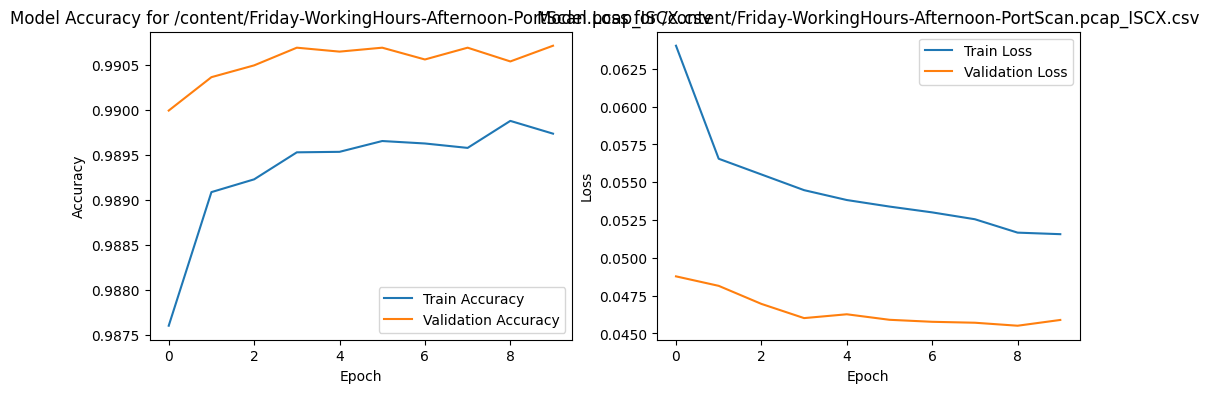

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 49s 12ms/step - accuracy: 0.9856 - loss: 0.0749 - val_accuracy: 0.9884 - val_loss: 0.0543
Epoch 2/10
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - accuracy: 0.9897 - loss: 0.0518 - val_accuracy: 0.9888 - val_loss: 0.0493
Epoch 3/10
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 80s 12ms/step - accuracy: 0.9900 - loss: 0.0481 - val_accuracy: 0.9887 - val_loss: 0.0485
Epoch 4/10
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - accuracy: 0.9896 - loss: 0.0465 - val_accuracy: 0.9888 - val_loss: 0.0462
Epoch 5/10
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 80s 12ms/step - accuracy: 0.9904 - loss: 0.0447 - val_accuracy: 0.9888 - val_loss: 0.0455
Epoch 6/10
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - accuracy: 0.9899 - loss: 0.0450 - val_accuracy: 0.9885 - val_loss: 0.0462
Epoch 7/10
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 48s 13ms/step - accuracy: 0.9906 - loss: 0.0407 - val_accuracy: 0.9888 - val_loss: 0.0442
Epoch 8/10
3818/3818 ━━━━━━━━━━━━━━━━━━━━ 80s 12ms/step - accuracy: 0.9897 -

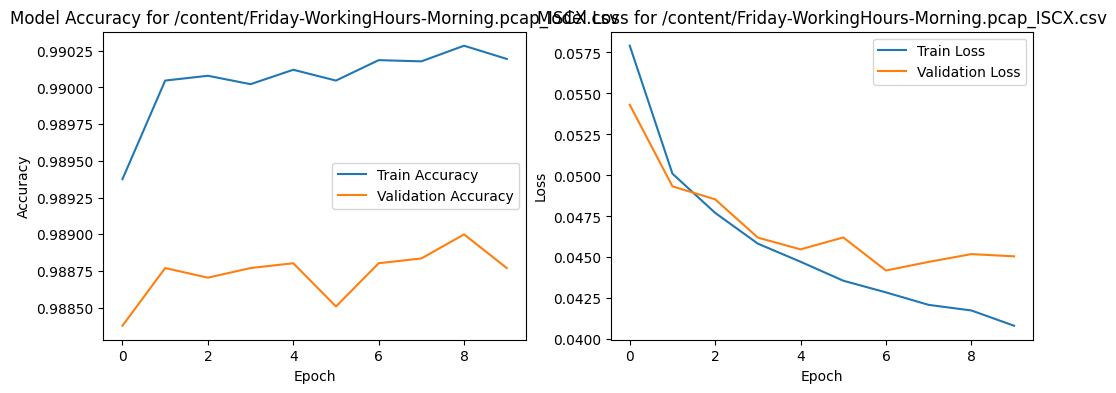

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
10590/10590 ━━━━━━━━━━━━━━━━━━━━ 146s 13ms/step - accuracy: 0.9978 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 5.2681e-09
Epoch 2/10
10590/10590 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - accuracy: 1.0000 - loss: 5.9339e-07 - val_accuracy: 1.0000 - val_loss: 6.9570e-13
Epoch 3/10
10590/10590 ━━━━━━━━━━━━━━━━━━━━ 200s 13ms/step - accuracy: 1.0000 - loss: 2.7067e-08 - val_accuracy: 1.0000 - val_loss: 7.5387e-15
Epoch 4/10
10590/10590 ━━━━━━━━━━━━━━━━━━━━ 146s 14ms/step - accuracy: 1.0000 - loss: 3.0194e-09 - val_accuracy: 1.0000 - val_loss: 8.3474e-16
Epoch 5/10
10590/10590 ━━━━━━━━━━━━━━━━━━━━ 201s 14ms/step - accuracy: 1.0000 - loss: 1.4260e-08 - val_accuracy: 1.0000 - val_loss: 1.3062e-16
Epoch 6/10
10590/10590 ━━━━━━━━━━━━━━━━━━━━ 202s 14ms/step - accuracy: 1.0000 - loss: 8.6420e-10 - val_accuracy: 1.0000 - val_loss: 5.1923e-17
Epoch 7/10
10590/10590 ━━━━━━━━━━━━━━━━━━━━ 143s 13ms/step - accuracy: 1.0000 - loss: 1.5152e-09 - val_accuracy: 1.0000 - val_loss: 2.5934e-17
Epo

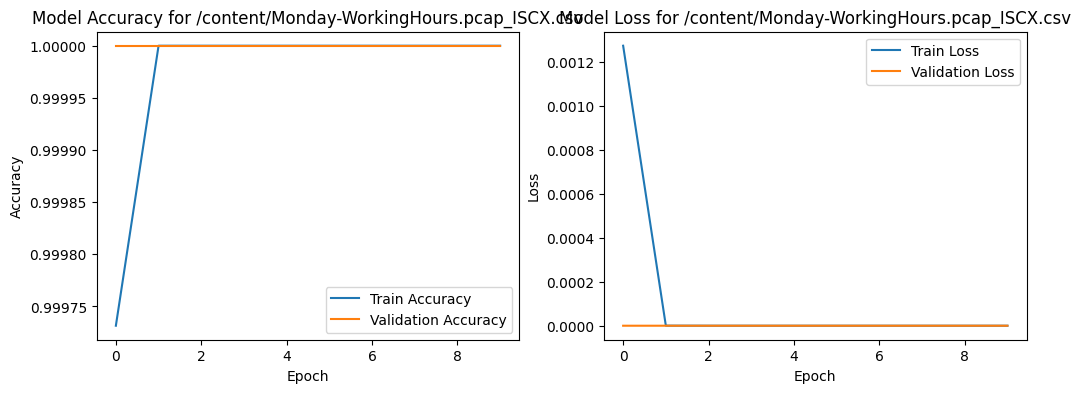

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5768/5768 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - accuracy: 0.9959 - loss: 0.0186 - val_accuracy: 0.9999 - val_loss: 7.1896e-04
Epoch 2/10
5768/5768 ━━━━━━━━━━━━━━━━━━━━ 78s 14ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9999 - val_loss: 7.1682e-04
Epoch 3/10
5768/5768 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9999 - val_loss: 7.1828e-04
Epoch 4/10
5768/5768 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9999 - val_loss: 7.0532e-04
Epoch 5/10
5768/5768 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9999 - val_loss: 7.0753e-04
Epoch 6/10
5768/5768 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9999 - val_loss: 7.2345e-04
Epoch 7/10
5768/5768 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9999 - val_loss: 6.9236e-04
Epoch 8/10
5768/5768 ━━━━━━━━━━━━━━━━━━━━ 88s 15

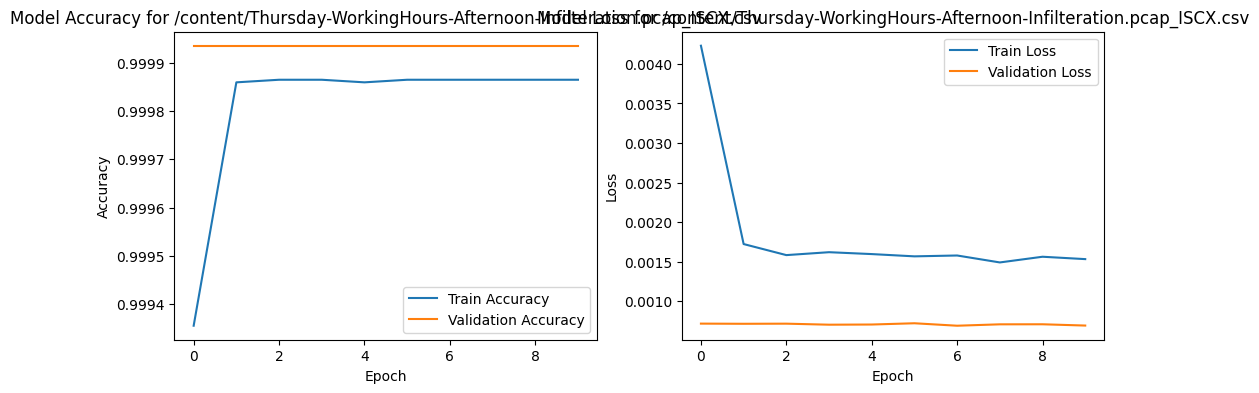

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3405/3405 ━━━━━━━━━━━━━━━━━━━━ 54s 14ms/step - accuracy: 0.9824 - loss: 0.1091 - val_accuracy: 0.9871 - val_loss: 0.0772
Epoch 2/10
3405/3405 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - accuracy: 0.9873 - loss: 0.0840 - val_accuracy: 0.9871 - val_loss: 0.0767
Epoch 3/10
3405/3405 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.9866 - loss: 0.0869 - val_accuracy: 0.9871 - val_loss: 0.0740
Epoch 4/10
3405/3405 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9872 - loss: 0.0794 - val_accuracy: 0.9871 - val_loss: 0.0740
Epoch 5/10
3405/3405 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - accuracy: 0.9872 - loss: 0.0782 - val_accuracy: 0.9871 - val_loss: 0.0721
Epoch 6/10
3405/3405 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - accuracy: 0.9874 - loss: 0.0748 - val_accuracy: 0.9871 - val_loss: 0.0720
Epoch 7/10
3405/3405 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.9871 - loss: 0.0756 - val_accuracy: 0.9871 - val_loss: 0.0710
Epoch 8/10
3405/3405 ━━━━━━━━━━━━━━━━━━━━ 50s 15ms/step - accuracy: 0.9876 -

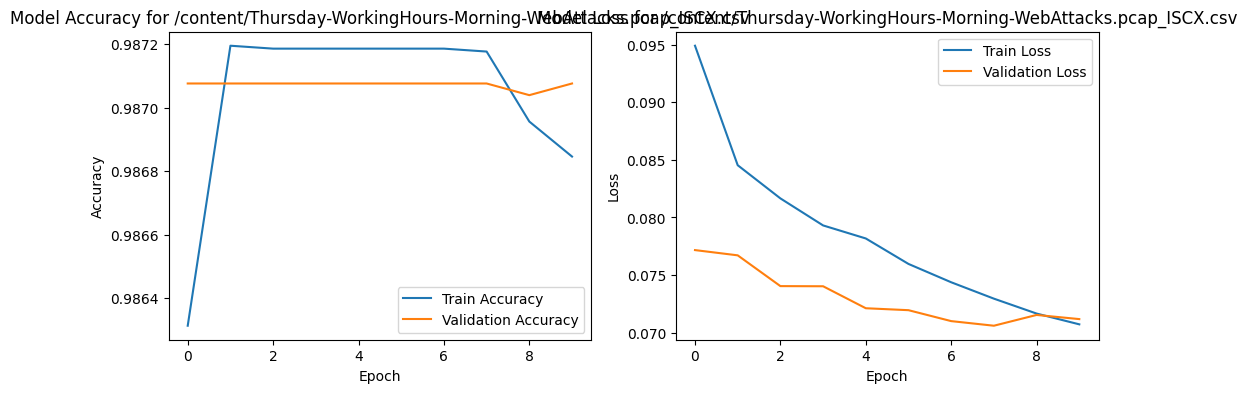

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
8913/8913 ━━━━━━━━━━━━━━━━━━━━ 142s 15ms/step - accuracy: 0.9662 - loss: 0.1806 - val_accuracy: 0.9698 - val_loss: 0.1526
Epoch 2/10
8913/8913 ━━━━━━━━━━━━━━━━━━━━ 141s 15ms/step - accuracy: 0.9697 - loss: 0.1540 - val_accuracy: 0.9699 - val_loss: 0.1462
Epoch 3/10
8913/8913 ━━━━━━━━━━━━━━━━━━━━ 142s 15ms/step - accuracy: 0.9700 - loss: 0.1490 - val_accuracy: 0.9714 - val_loss: 0.1407
Epoch 4/10
8913/8913 ━━━━━━━━━━━━━━━━━━━━ 142s 15ms/step - accuracy: 0.9708 - loss: 0.1436 - val_accuracy: 0.9712 - val_loss: 0.1375
Epoch 5/10
8913/8913 ━━━━━━━━━━━━━━━━━━━━ 135s 15ms/step - accuracy: 0.9715 - loss: 0.1392 - val_accuracy: 0.9732 - val_loss: 0.1338
Epoch 6/10
8913/8913 ━━━━━━━━━━━━━━━━━━━━ 142s 15ms/step - accuracy: 0.9722 - loss: 0.1382 - val_accuracy: 0.9723 - val_loss: 0.1334
Epoch 7/10
8913/8913 ━━━━━━━━━━━━━━━━━━━━ 140s 15ms/step - accuracy: 0.9724 - loss: 0.1346 - val_accuracy: 0.9727 - val_loss: 0.1336
Epoch 8/10
8913/8913 ━━━━━━━━━━━━━━━━━━━━ 133s 15ms/step - accuracy: 

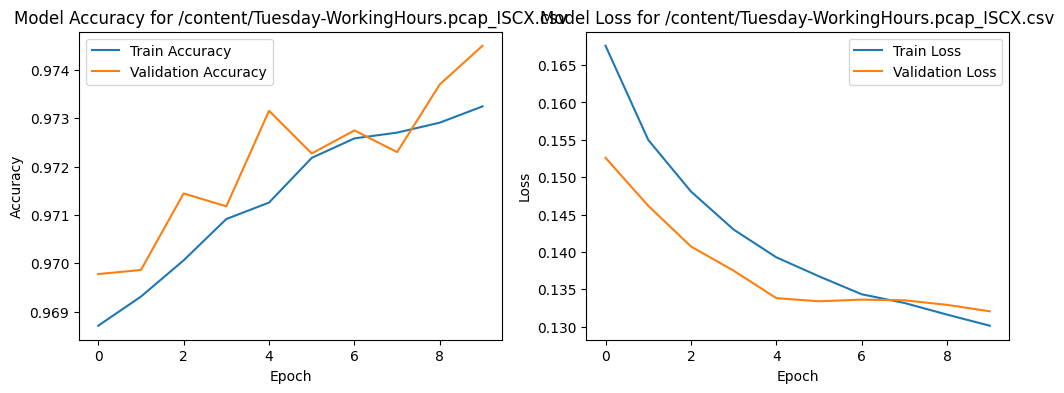

In [28]:
model = train_and_evaluate(file_paths)

In [32]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Saved models/trained_model.h5')